<h1 style="color:blueviolet;font-weight:700;text-align:center;">IRIS FLOWER CLASSIFICATION</h1>

---
<img src="img/iris_category.png" alt="iris flowers" style="display:block; margin:auto;">

## *Importing all necessary libraries & loading the dataset*

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data = load_iris()

## *Exploring the dataset* - ***Performing EDA***

In [3]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


By exploring upto this we can conclude that in this data set of IRIS Flower Dataset has 3 categories
- 0-49 is setosa
- 50-99 is versicolor
- 100-149 is virginica

In [10]:
df['flower_name'] =df.target.apply(lambda x: data.target_names[x])
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


## ***Performing Data Visualization***

In [11]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

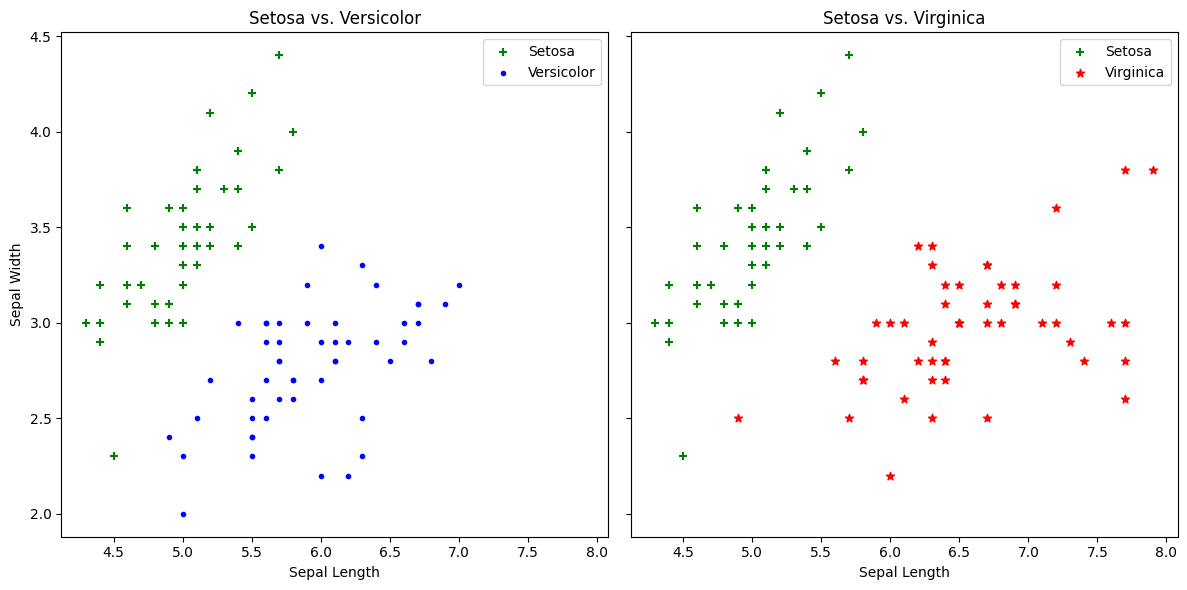

In [12]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Plot Setosa vs. Versicolor
axs[0].scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker="+", label="Setosa")
axs[0].scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker=".", label="Versicolor")
axs[0].set_title("Setosa vs. Versicolor")
axs[0].set_xlabel("Sepal Length")
axs[0].set_ylabel("Sepal Width")
axs[0].legend()

# Plot Setosa vs. Virginica
axs[1].scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker="+", label="Setosa")
axs[1].scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], color="red", marker="*", label="Virginica")
axs[1].set_title("Setosa vs. Virginica")
axs[1].set_xlabel("Sepal Length")
axs[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

**Petal length vs Petal Width (Setosa vs Versicolor)**

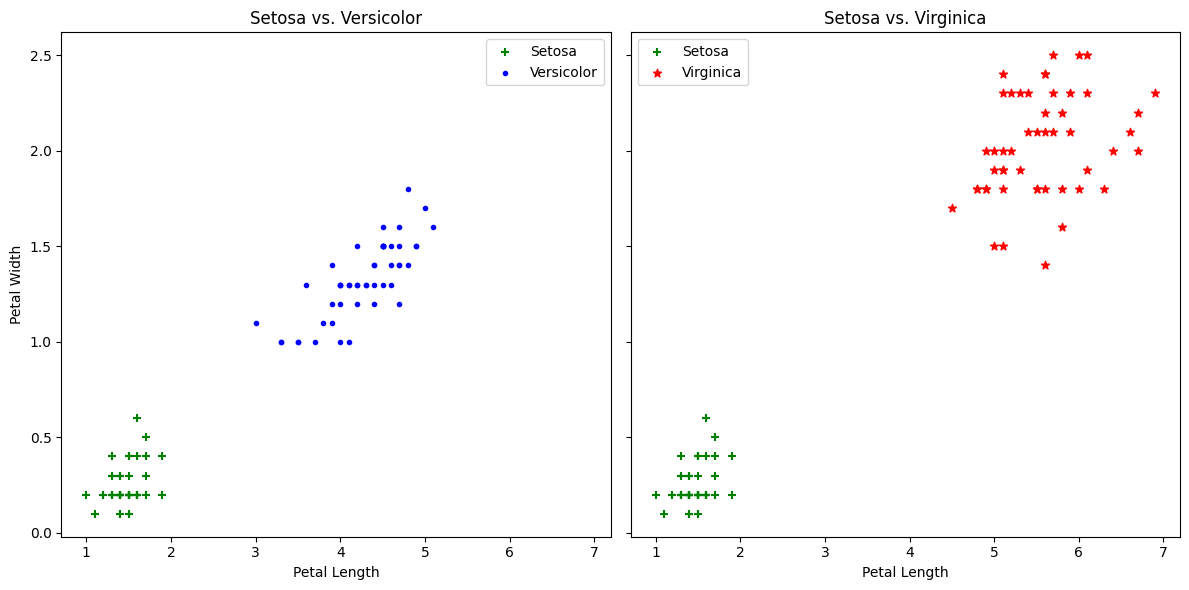

In [13]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Plot Setosa vs. Versicolor
axs[0].scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="green", marker="+", label="Setosa")
axs[0].scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="blue", marker=".", label="Versicolor")
axs[0].set_title("Setosa vs. Versicolor")
axs[0].set_xlabel("Petal Length")
axs[0].set_ylabel("Petal Width")
axs[0].legend()

# Plot Setosa vs. Virginica
axs[1].scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="green", marker="+", label="Setosa")
axs[1].scatter(df2["petal length (cm)"], df2["petal width (cm)"], color="red", marker="*", label="Virginica")
axs[1].set_title("Setosa vs. Virginica")
axs[1].set_xlabel("Petal Length")
axs[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [14]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

### *Spliting up training & Testing Data*

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(f"Training Data: {len(X_train)} || Testing Data: {len(X_test)}")

Training Data: 120 || Testing Data: 30


In [17]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


### ***Deciding using which Machine Learning Algorithm should we train our model:***

- Inorder to do this we will are performing ***`K-fold cross validation along with hyper parameter tuning`***

In [18]:
# Define models and hyperparameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 150],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly"]
    }
}

In [19]:
# Perform hyperparameter tuning and cross-validation
best_models = {}
cv_scores = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    cv_scores[model_name] = grid_search.best_score_

In [20]:
# Evaluate on the test set
test_accuracies = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    test_accuracies[model_name] = accuracy_score(y_test, y_pred)

# Display results
print("\nCross-validated Scores:")
for model_name, score in cv_scores.items():
    print(f"{model_name}: {score:.4f}")

print("\nTest Set Accuracies:")
for model_name, accuracy in test_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# Identify the best model
best_model_name = max(test_accuracies, key=test_accuracies.get)
print(f"\nThe best model is {best_model_name} with a test accuracy of {test_accuracies[best_model_name]:.4f}")


Cross-validated Scores:
Logistic Regression: 0.9667
Random Forest: 0.9500
SVM: 0.9583

Test Set Accuracies:
Logistic Regression: 1.0000
Random Forest: 1.0000
SVM: 1.0000

The best model is Logistic Regression with a test accuracy of 1.0000


# ***Training our model using Logistic Regression:***

In [21]:
model = LogisticRegression(C=1, max_iter= 100, solver= 'lbfgs')
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [22]:
model.score(X_test,y_test)*100

100.0

In [23]:
X_test[10:25]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
110,6.5,3.2,5.1,2.0
12,4.8,3.0,1.4,0.1
36,5.5,3.5,1.3,0.2
9,4.9,3.1,1.5,0.1
19,5.1,3.8,1.5,0.3
56,6.3,3.3,4.7,1.6
104,6.5,3.0,5.8,2.2
69,5.6,2.5,3.9,1.1
55,5.7,2.8,4.5,1.3
132,6.4,2.8,5.6,2.2


In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
model.predict([[6.4,2.8,5.6,2.1]])

array([2])

In [26]:
def clf_iris(*args):
    for i in args:  # Loop through each argument
        if i == 0:
            print("setosa")
        elif i == 1:
            print("versicolor")
        elif i == 2:
            print("virginica")
        else:
            print("Unknown class")

In [27]:
clf_iris(model.predict([[6.4,2.8,5.6,2.1]]))

virginica


## ***Saving the model:***

In [28]:
import pickle

with open("iris_clf_model.pkl","wb") as f:
    pickle.dump(model,f)

- **Testing after loading the model**

In [29]:
with open("iris_clf_model.pkl","rb") as f:
    mp = pickle.load(f)

In [30]:
clf_iris(mp.predict([[5.6, 2.5, 5.1, 1.1]]))

versicolor


- **Confusion matrix:**

In [31]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

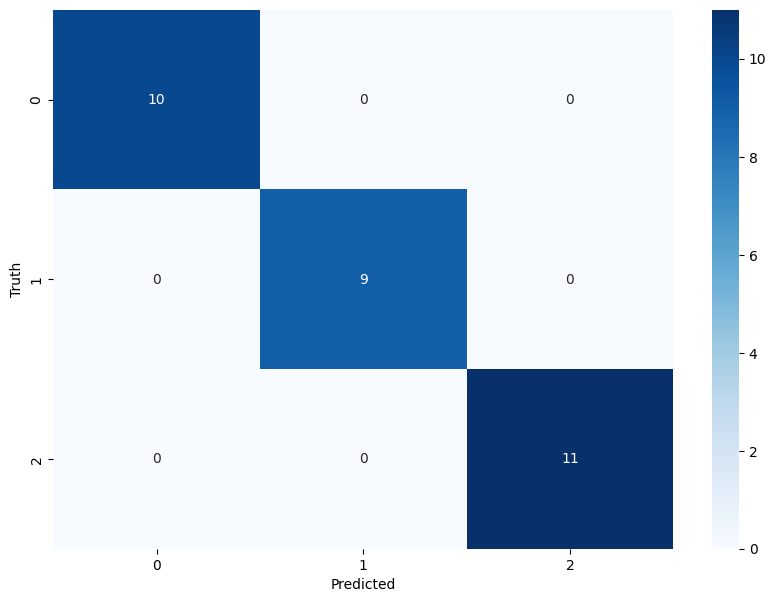

In [32]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')

- **Our model is giving 100% accuracy**
- **Because our Iris flower Classifer has less datapoints**
- **In other real life problems it will scoress less than 100% & That's completely Ok!**